In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable

import pyro
import pyro.distributions as dist
from pyro.distributions import Normal, MultivariateNormal
from pyro.infer import SVI, Trace_ELBO
from pyro.optim import Adam

In [3]:
from src.emoclass import *
from src.preprocess_util import *

In [4]:
IMG_SIZE = 128
NUM_CLASSES = len(emocat)
folder_path = '/home/studenti/ballerini/datasets/RAVDESS_frames'
model_path = "emoclassmodel.pth"

In [5]:
model = EmoClassCNN(IMG_SIZE, NUM_CLASSES).double()
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

Label:  disgust
Prediction:  disgust


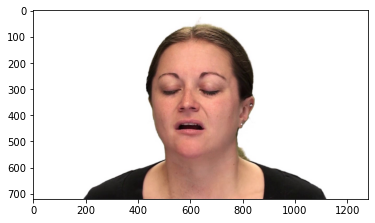

In [9]:
image, cat = getRandomImage(folder_path)

pred = predict(model, image, IMG_SIZE)

print('Label: ', emocat[cat])
print('Prediction: ', emocat[pred])

ca_loc = torch.tensor(EMOTION_CORE_AFFECT_MAP_LOC[emocat[pred]])
ca_dev = torch.tensor(EMOTION_CORE_AFFECT_MAP_STD_DEV[emocat[pred]])

plt.imshow(image)

In [10]:
valence_dist = Normal(ca_loc[0], ca_dev[0])
arousal_dist = Normal(ca_loc[1], ca_dev[1])

VA = (valence_dist.sample(), arousal_dist.sample())
print(VA)

(tensor(-0.1543), tensor(0.2016))
